In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
label_names = {
    0:  "Nucleoplasm",  
    1:  "Nuclear membrane",   
    2:  "Nucleoli",   
    3:  "Nucleoli fibrillar center",   
    4:  "Nuclear speckles",
    5:  "Nuclear bodies",   
    6:  "Endoplasmic reticulum",   
    7:  "Golgi apparatus",   
    8:  "Peroxisomes",   
    9:  "Endosomes",   
    10:  "Lysosomes",   
    11:  "Intermediate filaments",   
    12:  "Actin filaments",   
    13:  "Focal adhesion sites",   
    14:  "Microtubules",   
    15:  "Microtubule ends",   
    16:  "Cytokinetic bridge",   
    17:  "Mitotic spindle",   
    18:  "Microtubule organizing center",   
    19:  "Centrosome",   
    20:  "Lipid droplets",   
    21:  "Plasma membrane",   
    22:  "Cell junctions",   
    23:  "Mitochondria",   
    24:  "Aggresome",   
    25:  "Cytosol",   
    26:  "Cytoplasmic bodies",   
    27:  "Rods & rings"
}
#단백질의 종류를 나열 한 것입니다.

In [3]:
reverse_train_labels = dict((v,k) for k,v in label_names.items()) #위의 dict형 자료형을 key와 value값을 바꿔주는 코드입니다.

In [4]:
reverse_train_labels

{'Actin filaments': 12,
 'Aggresome': 24,
 'Cell junctions': 22,
 'Centrosome': 19,
 'Cytokinetic bridge': 16,
 'Cytoplasmic bodies': 26,
 'Cytosol': 25,
 'Endoplasmic reticulum': 6,
 'Endosomes': 9,
 'Focal adhesion sites': 13,
 'Golgi apparatus': 7,
 'Intermediate filaments': 11,
 'Lipid droplets': 20,
 'Lysosomes': 10,
 'Microtubule ends': 15,
 'Microtubule organizing center': 18,
 'Microtubules': 14,
 'Mitochondria': 23,
 'Mitotic spindle': 17,
 'Nuclear bodies': 5,
 'Nuclear membrane': 1,
 'Nuclear speckles': 4,
 'Nucleoli': 2,
 'Nucleoli fibrillar center': 3,
 'Nucleoplasm': 0,
 'Peroxisomes': 8,
 'Plasma membrane': 21,
 'Rods & rings': 27}

In [5]:
def fill_targets(row):
    row.Target = np.array(row.Target.split(" ")).astype(np.int)
    ## Target column에 있는 값들을 array로 변환 한다.
    for num in row.Target:
        name = label_names[int(num)]
        row.loc[name] = 1
    return row

In [6]:
train_labels = pd.read_csv("train.csv")
check_labelSum = pd.read_csv("train.csv")

In [7]:
train_labels.head()

,Id,Target
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18


In [8]:
for key in label_names.keys():
    train_labels[label_names[key]] = 0
    check_labelSum[label_names[key]] = 0

In [9]:
train_labels = train_labels.apply(fill_targets, axis = 1 )
check_labelSum = check_labelSum.apply(fill_targets, axis = 1 )
#위의 코드는 csv file을 one_hot code로 변경하는 code입니다.

Nucleoplasm                      12885
Cytosol                           8228
Plasma membrane                   3777
Nucleoli                          3621
Mitochondria                      2965
Golgi apparatus                   2822
Nuclear bodies                    2513
Nuclear speckles                  1858
Nucleoli fibrillar center         1561
Centrosome                        1482
Nuclear membrane                  1254
Intermediate filaments            1093
Microtubules                      1066
Endoplasmic reticulum             1008
Microtubule organizing center      902
Cell junctions                     802
Actin filaments                    688
Focal adhesion sites               537
Cytokinetic bridge                 530
Cytoplasmic bodies                 328
Aggresome                          322
Mitotic spindle                    210
Lipid droplets                     172
Peroxisomes                         53
Endosomes                           45
Lysosomes                

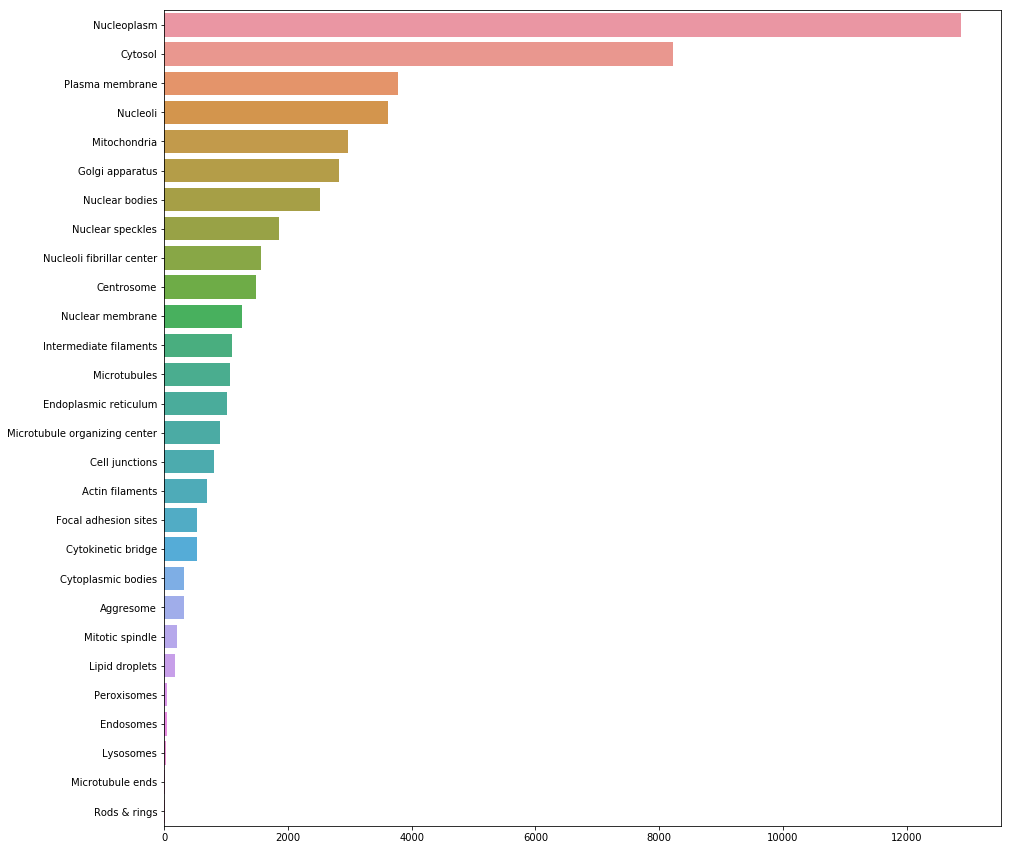

In [10]:
target_counts = train_labels.drop(["Id","Target"], axis = 1).sum(axis = 0).sort_values(ascending = False)
print(target_counts)
plt.figure(figsize = (15,15))
sns.barplot(y = target_counts.index.values, x = target_counts.values, order = target_counts.index)
plt.show()

In [12]:
check_labelSum["number_of_targets"] = check_labelSum.drop(["Id","Target"],axis = 1).sum(axis = 1)

In [15]:
check_labelSum["number_of_targets"].value_counts() 

1    15126
2    12485
3     3160
4      299
5        2
Name: number_of_targets, dtype: int64